<a href="https://colab.research.google.com/github/leonardosolar/intelligence-artificial/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Regressão Linear`**

Trata-se de um conjunto de dados que contem, para a Variável X: Investimento em Propaganda de Uma Rede de Supermercados. A variável Y: Vendas Após Veiculação da Propaganda.

**Instalando dependências**
Utilizará a biblioteca gspread para gerenciar a API do Google Sheets

In [1]:
# https://gspread.readthedocs.io/en/latest/user-guide.html
!pip install --upgrade gspread

  Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1


**Download do Dataset**


**Criando credenciais**
Após instalar todas as bibliotecas necessárias vamos criar uma credencial no Google para gerenciar as planilhas.

In [25]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_key('11zHQchwsEXbUhZSX8RcaAC3hZzHkYiL74n7zjSt-hk8')

ws = wb.worksheet('Página1')

# get_all_values gives a list of rows.
rows = ws.get_all_values()
print(rows)

[['Investimento em Propaganda', 'Vendas'], ['30', '430'], ['21', '335'], ['35', '520'], ['42', '490'], ['37', '470'], ['2', '210'], ['8', '195'], ['17', '270'], ['35', '400'], ['25', '480']]



**Carregar o dataset para um Dataframe (Pandas)**

In [26]:
# Convert to a DataFrame and render.
import pandas as pd
#pd.DataFrame.from_records(rows)
# Cria um dataset chamado 'df' que receberá os dados da planilha
df = pd.DataFrame(ws.get_all_records())
df.head()

,Investimento em Propaganda,Vendas
0,30,430
1,21,335
2,35,520
3,42,490
4,37,470


In [27]:
# Removendo os espaços em branco
cols = df.columns
cols = cols.map(lambda x: x.replace(' ','') if isinstance(x, (str)) else x)
df.columns = cols

#EXIBE A ESTRUTURA DO DATAFRAME
print(df)

#Exibe o resumo do Dataset
# print(df.describe()) 

   InvestimentoemPropaganda  Vendas
0                        30     430
1                        21     335
2                        35     520
3                        42     490
4                        37     470
5                         2     210
6                         8     195
7                        17     270
8                        35     400
9                        25     480


Selecionar apenas as features Investimento em Propaganda e Vendas

In [36]:
investimento =  df[['InvestimentoemPropaganda']]
vendas = df[['Vendas']]
print(vendas.head())

   Vendas
0     430
1     335
2     520
3     490
4     470


**Dividir o dataset em dados de treinamento e dados de teste**

Utilizaremos o train_test_split da bilbioteca scikitlearn

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
investimento_treino, investimento_test, vendas_treino, vendas_teste = train_test_split(investimento, vendas, test_size=0.2, random_state=42)
print(type(investimento_treino))

<class 'pandas.core.frame.DataFrame'>


**Exibir a correlação entre as features do dataset de treinamento**

Usaremos Matplotlib que é uma biblioteca para a visualização de dados em Python;
 Matplotlib.pyplot é um módulo da matplotlib

In [39]:
from matplotlib import pyplot as plt

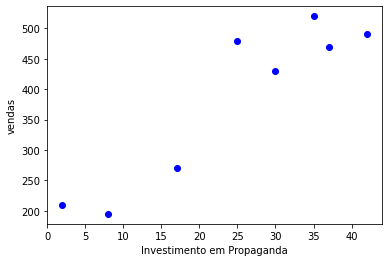

In [40]:
plt.scatter(investimento_treino, vendas_treino, color='blue')
plt.xlabel("Investimento em Propaganda")
plt.ylabel("vendas")
plt.show()